In [35]:
import requests
import os
import numpy as np
import matplotlib
from genericdlmodel import Model
%matplotlib widget

In [36]:
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0"
}
request_opts = {
    "headers": headers,
    "params": {"raw":"true"}
}

In [37]:
data_dir = "../data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
fname = "mnist.npz"
fpath = os.path.join(data_dir, fname)
if not os.path.exists(fpath):
    print('Downloading file: ' + fname)
    resp = requests.get(base_url + fname, stream = True, **request_opts)
    resp.raise_for_status()
    with open(fpath, "wb") as fh:
        for chunk in resp.iter_content(chunk_size=128):
            fh.write(chunk)

In [38]:
data_file = np.load(fpath)
x_train = data_file["x_train"]
x_test = data_file["x_test"]
y_train = data_file["y_train"]
y_test = data_file["y_test"]
data_file.close()

In [39]:
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

In [40]:
sample_size = int(len(x_train))
test_split = 5 * sample_size // 6
seed = 1234
rng = np.random.default_rng(seed=seed)
index = rng.choice(len(x_train), sample_size)
train_sample_X = x_train[index[:test_split]]
val_sample_X = x_train[index[test_split:]]
train_sample_y = y_train[index[:test_split]]
val_sample_y = y_train[index[test_split:]]

In [41]:
train_sample_X = train_sample_X * 1.0 / 255
val_sample_X = val_sample_X * 1.0 / 255
test_sample_X = x_test * 1.0 / 255

In [42]:
def one_hot_encoding(labels, dim=10):
    one_hot_labels = labels[..., None] == np.arange(dim)[None]
    return one_hot_labels.astype(np.float64)

In [43]:
train_sample_labels = one_hot_encoding(train_sample_y)
val_sample_labels = one_hot_encoding(val_sample_y)
test_sample_labels = one_hot_encoding(y_test)

In [10]:
learning_rate = 0.1
epochs = 20
pixels_per_image = 28 * 28
num_labels = 10
batch_size = 100
dropout = 0.45
hidden_layer_sizes = [200,50]
update_rule = "identity"
update_args = {}

In [11]:
model = Model(rng=rng,
              training_data_X=train_sample_X,
              training_data_y=train_sample_labels,
              val_data_X=val_sample_X,
              val_data_y=val_sample_labels,
              objective_function='categoricalcrossentropy',
              learning_rate=learning_rate,
              epochs=epochs,
              batch_size=batch_size
             )

In [12]:
for output_size in hidden_layer_sizes:
    model.add_layer(output_size=output_size,
                    func_name='relu',
                    dropout=dropout,
                    update_rule=update_rule,
                    update_args=update_args
                   )
model.add_final_layer()

In [13]:
model.run()

Epoch: 0
  Training loss:          20.743
  Training accuracy:      0.340
  Validation loss:        19.891
  Validation accuracy:    0.474

Epoch: 1
  Training loss:          19.482
  Training accuracy:      0.535
  Validation loss:        19.046
  Validation accuracy:    0.589

Epoch: 2
  Training loss:          20.208
  Training accuracy:      0.623
  Validation loss:        19.720
  Validation accuracy:    0.648

Epoch: 3
  Training loss:          20.743
  Training accuracy:      0.666
  Validation loss:        19.928
  Validation accuracy:    0.687

Epoch: 4
  Training loss:          21.089
  Training accuracy:      0.705
  Validation loss:        20.111
  Validation accuracy:    0.728

Epoch: 5
  Training loss:          21.312
  Training accuracy:      0.728
  Validation loss:        20.633
  Validation accuracy:    0.739

Epoch: 6
  Training loss:          21.537
  Training accuracy:      0.752
  Validation loss:        20.962
  Validation accuracy:    0.759

Epoch: 7
  Training 

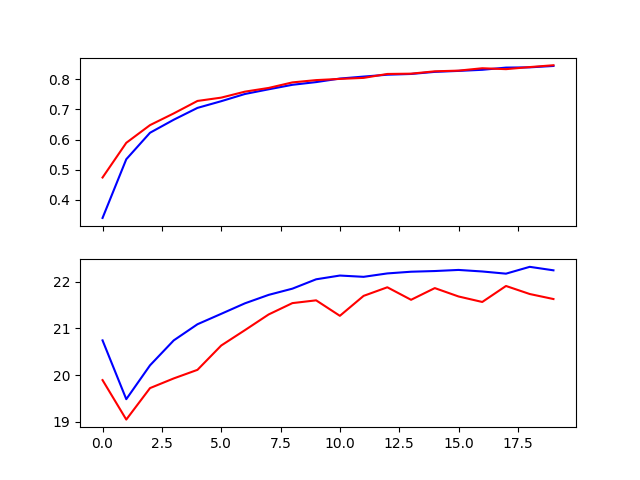

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
fig, axs = subplots(2, sharex='col')
x = np.arange(epochs)
y1 = model.training_acc
y2 = model.training_loss
y3 = model.val_acc
y4 = model.val_loss
axs[0].plot(x,y1,'b-')
axs[1].plot(x,y2,'b-')
axs[0].plot(x,y3,'r-')
axs[1].plot(x,y4,'r-')

In [44]:
learning_rate = 0.1
epochs = 20
pixels_per_image = 28 * 28
num_labels = 10
batch_size = 100
dropout = 0
hidden_layer_sizes = [200,50]
update_rule = "SVD"
update_args = {'rank' : 10}

In [45]:
model2 = Model(rng=rng,
              training_data_X=train_sample_X,
              training_data_y=train_sample_labels,
              val_data_X=val_sample_X,
              val_data_y=val_sample_labels,
              objective_function='categoricalcrossentropy',
              learning_rate=learning_rate,
              epochs=epochs,
              batch_size=batch_size
             )

In [46]:
for output_size in hidden_layer_sizes:
    model2.add_layer(output_size=output_size,
                    func_name='relu',
                    dropout=dropout,
                    update_rule=update_rule,
                    update_args=update_args
                   )
model2.add_final_layer()

In [34]:
model2.run()

Epoch: 0
  Training loss:          23.081
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 1
  Training loss:          23.063
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 2
  Training loss:          23.063
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 3
  Training loss:          23.063
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 4
  Training loss:          23.063
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 5
  Training loss:          23.063
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 6
  Training loss:          23.063
  Training accuracy:      0.107
  Validation loss:        23.048
  Validation accuracy:    0.112

Epoch: 7
  Training 

KeyboardInterrupt: 